In [3]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
#loading boston housing data
boston = pd.read_csv('boston_prices-2.csv')

### Data description
#### The Boston dataset has 506 rows and 14 columns and MEDV is our target varible.
#### This data frame contains the following columns:
##### CRIM: This is the per capita crime rate by town
##### ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
##### INDUS: This is the proportion of non-retail business acres per town.
##### CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
##### NOX: This is the nitric oxides concentration (parts per 10 million)
##### RM: This is the average number of rooms per dwelling
##### AGE: This is the proportion of owner-occupied units built prior to 1940
##### DIS: This is the weighted distances to five Boston employment centers
##### RAD: This is the index of accessibility to radial highways
##### TAX: This is the full-value property-tax rate per 10,000 dollar
##### PTRATIO: This is the pupil-teacher ratio by town
##### B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
##### LSTAT: This is the percentage lower status of the population
##### MEDV: This is the median value of owner-occupied homes in $1000s


In [5]:
#shape of data (rows, columns)
boston.shape

(506, 14)

In [6]:
#printing first 10 samples
boston.head(10)

,CRIM,ZN,INDUS,Charles River dummy variable,nitric oxides concentration,#rooms/dwelling,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [25]:
#checking for nulls and datatypes
boston.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CRIM                          506 non-null    float64
 1   ZN                            506 non-null    float64
 2   INDUS                         506 non-null    float64
 3   Charles River dummy variable  506 non-null    float64
 4   nitric oxides concentration   506 non-null    float64
 5   #rooms/dwelling               506 non-null    float64
 6   AGE                           506 non-null    float64
 7   DIS                           506 non-null    float64
 8   RAD                           506 non-null    int64  
 9   TAX                           506 non-null    float64
 10  PTRATIO                       506 non-null    float64
 11  B                             506 non-null    float64
 12  LSTAT                         506 non-null    float64
 13  MEDV 

In [30]:
#checking all data types
boston.dtypes

CRIM                            float64
ZN                              float64
INDUS                           float64
Charles River dummy variable    float64
nitric oxides concentration     float64
#rooms/dwelling                 float64
AGE                             float64
DIS                             float64
RAD                               int64
TAX                             float64
PTRATIO                         float64
B                               float64
LSTAT                           float64
MEDV                            float64
dtype: object

In [28]:
boston['MEDV']=pd.to_numeric(boston['MEDV'])

In [8]:
#counting null values
boston.isna().sum()

CRIM                             0
ZN                               0
INDUS                            0
Charles River dummy variable     0
nitric oxides concentration      0
#rooms/dwelling                  0
AGE                              0
DIS                              0
RAD                              0
TAX                              0
PTRATIO                          0
B                                0
LSTAT                            0
MEDV                            54
dtype: int64

In [9]:
#descriptive statistics and summary of dataset
boston.describe()

,CRIM,ZN,INDUS,Charles River dummy variable,nitric oxides concentration,#rooms/dwelling,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,452.000000
mean,1.269195,13.295257,9.205158,0.140765,1.101175,15.679800,58.744660,6.173308,78.063241,339.317787,42.614980,332.791107,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.312765,1.646991,27.220206,33.104049,6.476435,203.542157,180.670077,87.585243,125.322456,6.064932,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049442,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.430575,4.000000,254.000000,17.000000,364.995000,6.877500,18.500000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.925850,5.000000,307.000000,18.900000,390.660000,10.380000,21.950000
75%,0.819622,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.332075,24.000000,403.000000,20.200000,395.615000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


In [10]:
#filling null values with mean of MEDV column
boston['MEDV']=boston['MEDV'].fillna('23.750442')

In [11]:
#seperating features and target variable
#X contains features
X= boston.drop(columns=['MEDV'])

In [12]:
#printing first 5 rows
X.head()

,CRIM,ZN,INDUS,Charles River dummy variable,nitric oxides concentration,#rooms/dwelling,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [13]:
#y contains only target variable
y = boston['MEDV']
boston.head()

,CRIM,ZN,INDUS,Charles River dummy variable,nitric oxides concentration,#rooms/dwelling,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


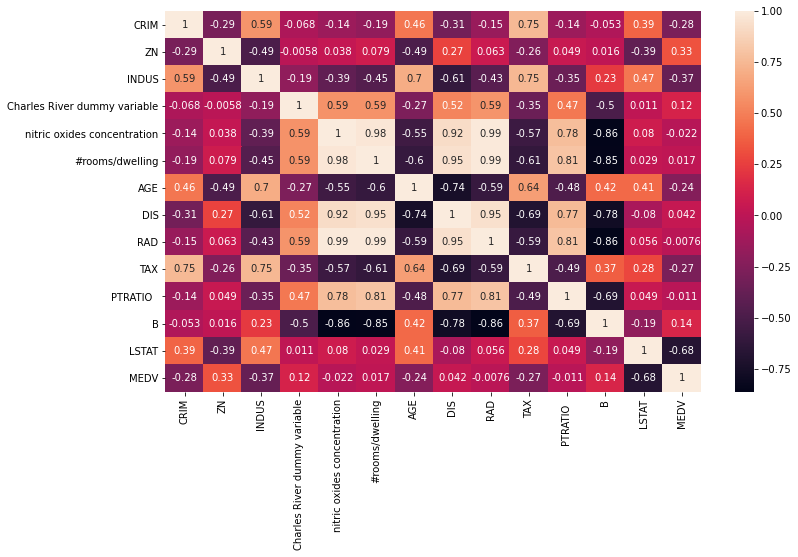

In [31]:
#checking correlation of features by heatmap using seaboan library
plt.figure(figsize=(12,7))
sns.heatmap(boston.corr(),annot=True)

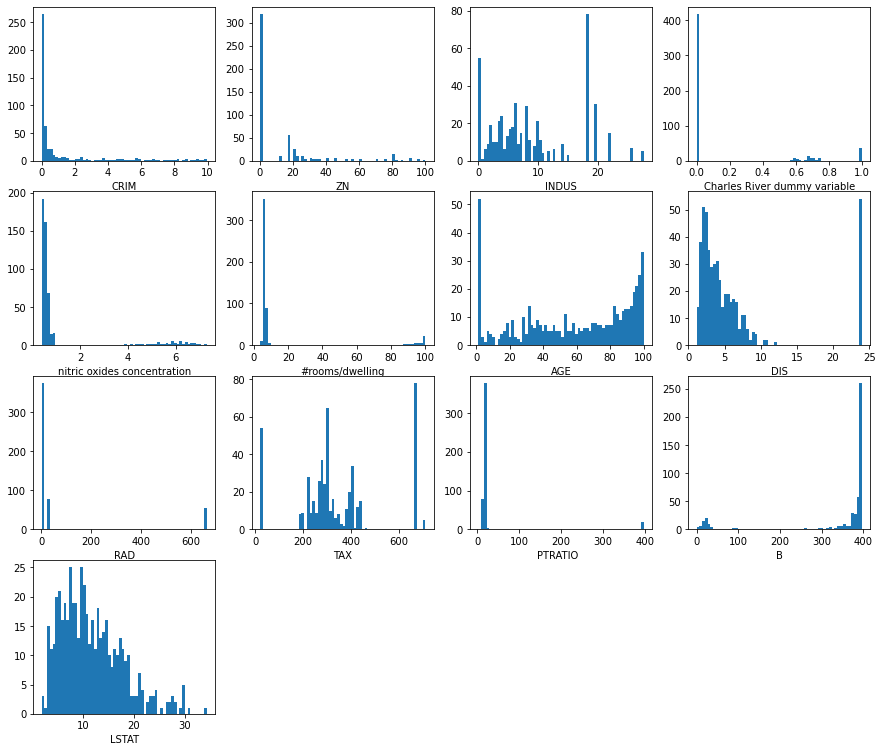

In [15]:
#checking overall data
boston_plotting = boston.drop(columns=['MEDV']) 
plt.figure(figsize=(15,13))
for i,col in enumerate(boston_plotting):
    plt.subplot(4,4,i+1)
    plt.xlabel(col)
    plt.hist(boston_plotting[col],bins=60)

In [16]:
#scaler using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
X_scaling=scaling.fit_transform(X)

In [17]:
#splitting the data
X_train,X_test,y_train,y_test = train_test_split(X_scaling,y,test_size=0.3,random_state=42)

In [18]:
X_scaling

array([[6.34121771e-04, 1.80000000e-01, 8.32732516e-02, ...,
        3.22089779e-02, 1.00000000e+00, 9.94492044e-02],
       [2.74016860e-03, 0.00000000e+00, 2.54866619e-01, ...,
        3.85493279e-02, 1.00000000e+00, 2.26744186e-01],
       [2.73816189e-03, 0.00000000e+00, 2.54866619e-01, ...,
        3.85493279e-02, 9.89737254e-01, 7.03794370e-02],
       ...,
       [6.09639855e-03, 0.00000000e+00, 4.30064888e-01, ...,
        4.66649759e-02, 1.00000000e+00, 1.19645043e-01],
       [1.09957919e-02, 0.00000000e+00, 4.30064888e-01, ...,
        4.66649759e-02, 9.91300620e-01, 1.45348837e-01],
       [4.75691664e-03, 0.00000000e+00, 4.30064888e-01, ...,
        4.66649759e-02, 1.00000000e+00, 1.88188494e-01]])

In [20]:
#linear regression model
linear = LinearRegression()
lr=linear.fit(X_train,y_train)

In [21]:
#printing accuracy score
acc_train_lr=lr.score(X_train,y_train)
print(acc_train_lr)
acc_test_lr=lr.score(X_test,y_test)
print(acc_test_lr)

0.5731277144477408
0.5657253336904817


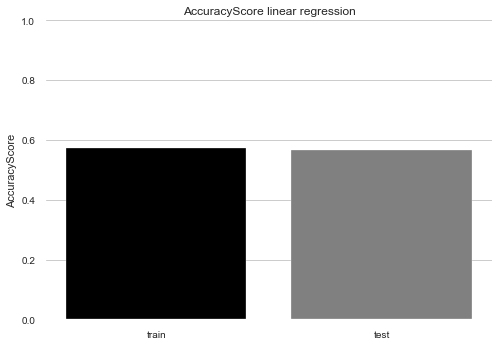

In [22]:
#plotting accuracy score
plt.bar(['train','test'],[acc_train_lr,acc_test_lr],color=('black','grey'))
plt.title('AccuracyScore linear regression')
plt.grid(axis='y')
plt.ylim(0, 1)
plt.ylabel('AccuracyScore')
plt.show()

In [23]:
#predicting using x_test
y_pred_lr=linear.predict(X_test)

In [24]:
#mean squared error
mean_squared_error(y_test,y_pred_lr)

26.135060676588743

Training set accuracy for 5 depth is : 0.91
Testing set accuracy for 5 depth is : 0.72


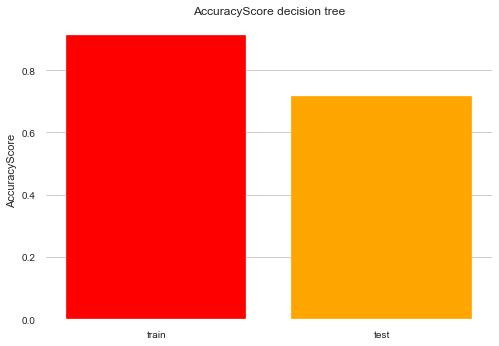

Training set accuracy for 6 depth is : 0.95
Testing set accuracy for 6 depth is : 0.81


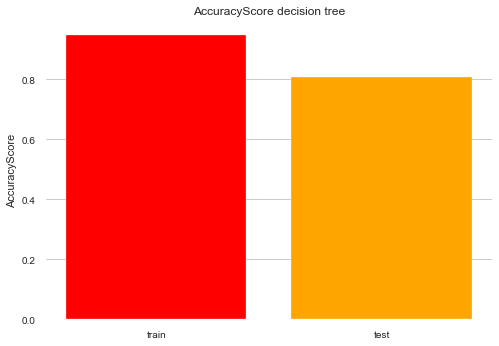

Training set accuracy for 7 depth is : 0.97
Testing set accuracy for 7 depth is : 0.78


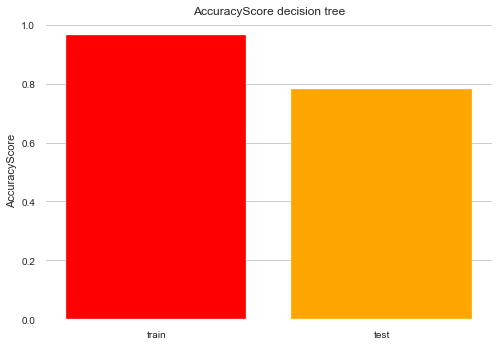

Training set accuracy for 8 depth is : 0.98
Testing set accuracy for 8 depth is : 0.83


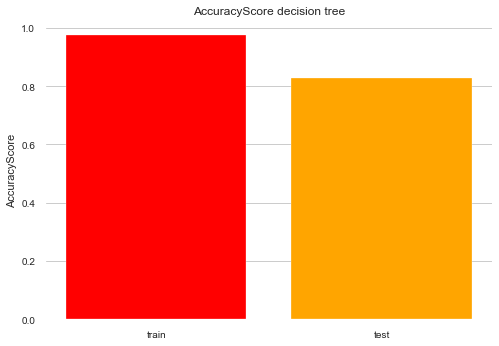

Training set accuracy for 9 depth is : 0.99
Testing set accuracy for 9 depth is : 0.80


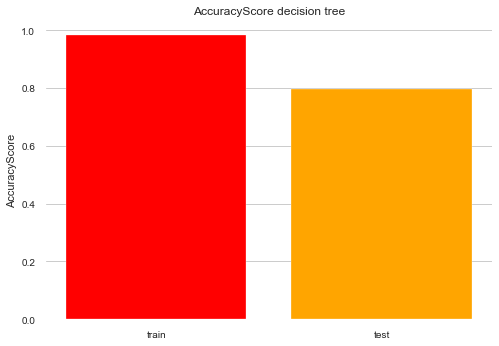

Training set accuracy for 10 depth is : 0.99
Testing set accuracy for 10 depth is : 0.82


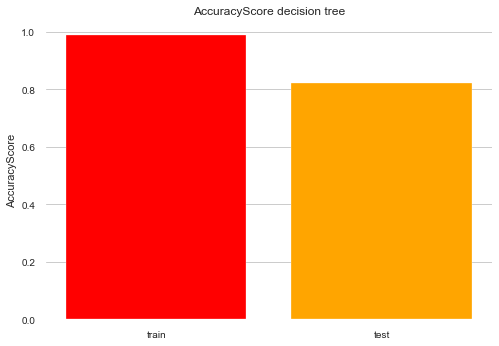

Training set accuracy for 11 depth is : 0.99
Testing set accuracy for 11 depth is : 0.82


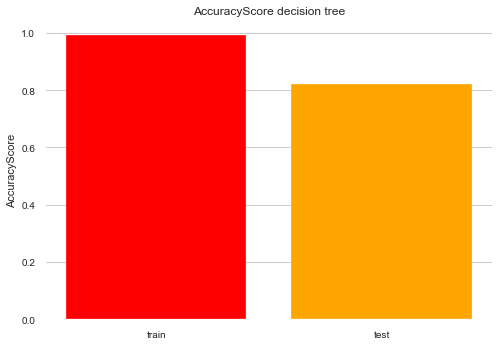

Training set accuracy for 12 depth is : 1.00
Testing set accuracy for 12 depth is : 0.80


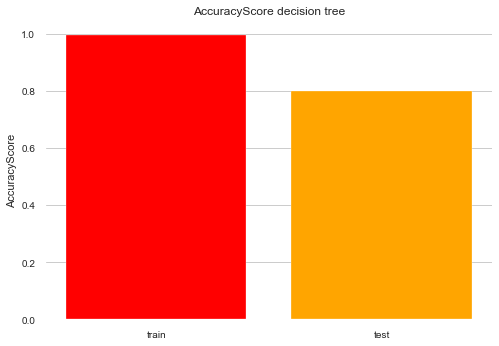

Training set accuracy for 13 depth is : 1.00
Testing set accuracy for 13 depth is : 0.81


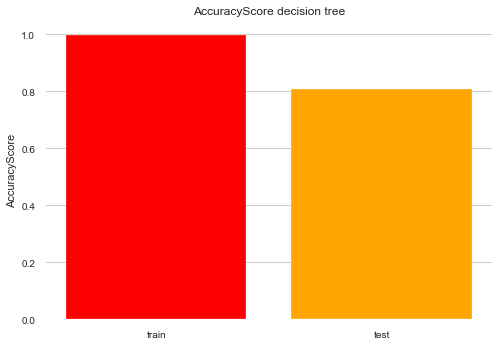

Training set accuracy for 14 depth is : 1.00
Testing set accuracy for 14 depth is : 0.82


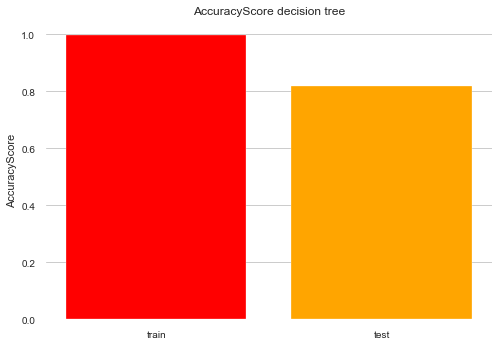

Training set accuracy for 15 depth is : 1.00
Testing set accuracy for 15 depth is : 0.81


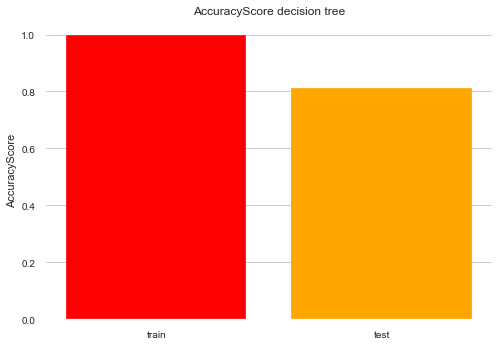

In [37]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor
#setting max depth from 5 to 15
for i in range(5,16):
    ds = DecisionTreeRegressor(max_depth=i,random_state=42)
    ds.fit(X_train,y_train)
    acc_train_ds = ds.score(X_train,y_train)
    acc_test_ds = ds.score(X_test,y_test) 
#printing accuracy score    
    print("Training set accuracy for {} depth is : {:.2f}".format(i,acc_train_ds))
    print("Testing set accuracy for {} depth is : {:.2f}".format(i,acc_test_ds))
# plotting accuracy score    
    plt.bar(['train','test'],[acc_train_ds,acc_test_ds],color=('red','orange'))
    plt.title('AccuracyScore decision tree')
    plt.grid(axis='y')
    plt.ylabel('AccuracyScore')
    plt.show()

In [26]:
#predicting using X test
y_pred_ds=ds.predict(X_test)

In [27]:
#mean squared error
mean_squared_error(y_test,y_pred_ds)

11.378347953216375

In [28]:
#importance features decision tree
ds.feature_importances_

array([2.35267026e-02, 1.02448843e-04, 2.27208518e-03, 4.41017876e-05,
       8.70891850e-03, 2.20203447e-01, 3.24737599e-02, 1.20356970e-01,
       6.60116297e-04, 6.04112342e-03, 5.63315179e-02, 1.37970584e-02,
       5.15481751e-01])

Training set accuracy for 5 depth is : 0.93
Testing set accuracy for 5 depth is : 0.84


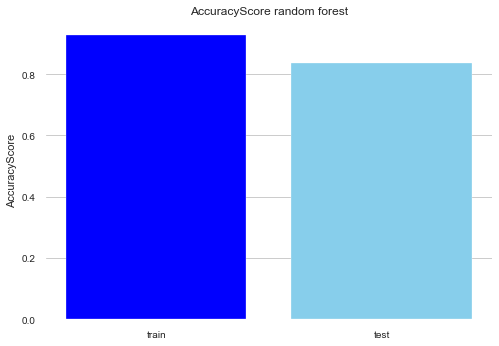

Training set accuracy for 6 depth is : 0.95
Testing set accuracy for 6 depth is : 0.85


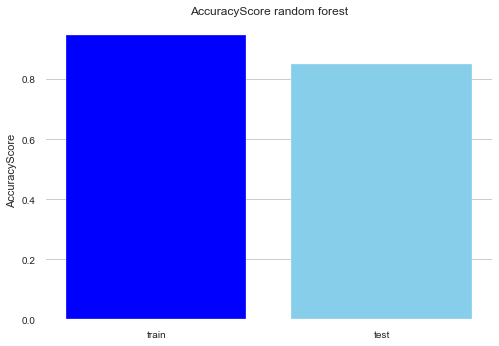

Training set accuracy for 7 depth is : 0.96
Testing set accuracy for 7 depth is : 0.86


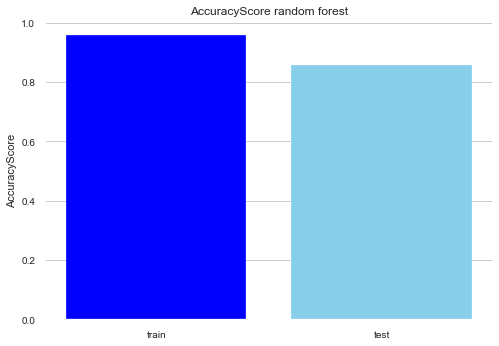

Training set accuracy for 8 depth is : 0.97
Testing set accuracy for 8 depth is : 0.86


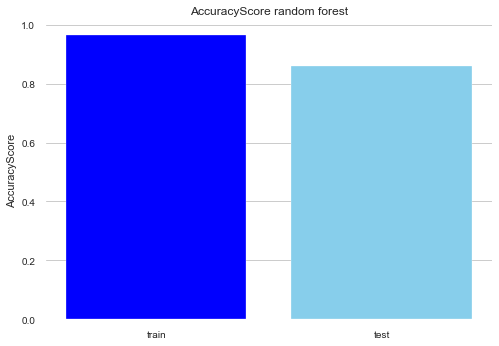

Training set accuracy for 9 depth is : 0.97
Testing set accuracy for 9 depth is : 0.86


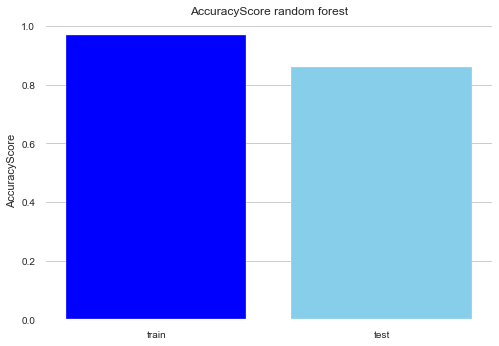

Training set accuracy for 10 depth is : 0.97
Testing set accuracy for 10 depth is : 0.86


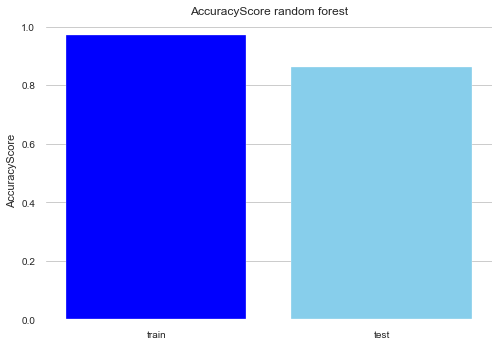

Training set accuracy for 11 depth is : 0.97
Testing set accuracy for 11 depth is : 0.86


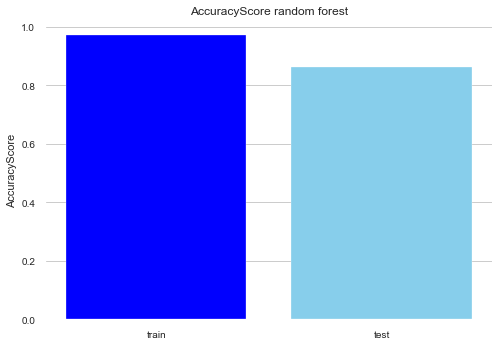

Training set accuracy for 12 depth is : 0.97
Testing set accuracy for 12 depth is : 0.86


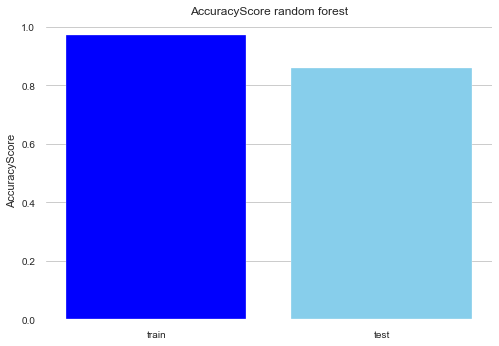

Training set accuracy for 13 depth is : 0.97
Testing set accuracy for 13 depth is : 0.86


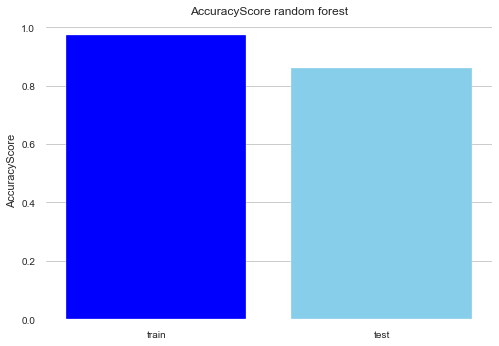

Training set accuracy for 14 depth is : 0.97
Testing set accuracy for 14 depth is : 0.86


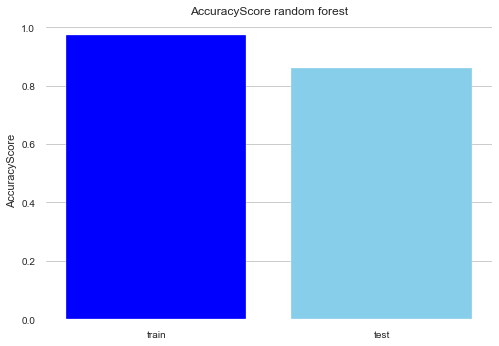

Training set accuracy for 15 depth is : 0.97
Testing set accuracy for 15 depth is : 0.86


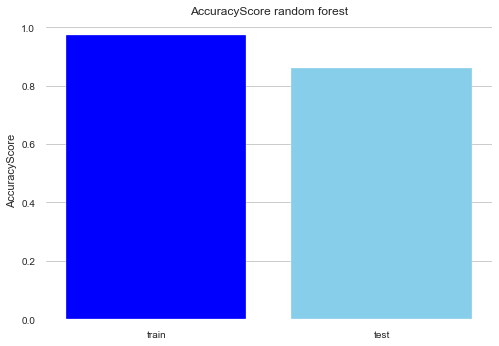

In [29]:
#random forest regression
from sklearn.ensemble import RandomForestRegressor
#setting max depth from 5 to 15
for i in range(5,16):
    rf = RandomForestRegressor(max_depth=i,random_state=42)
    rf.fit(X_train,y_train)
    acc_train = rf.score(X_train,y_train)
    acc_test = rf.score(X_test,y_test) 
#printing accuracy score    
    print("Training set accuracy for {} depth is : {:.2f}".format(i,acc_train))
    print("Testing set accuracy for {} depth is : {:.2f}".format(i,acc_test))
#plotting accuracy score    
    plt.bar(['train','test'],[acc_train,acc_test],color=('blue','skyblue'))
    plt.title('AccuracyScore random forest')
    plt.grid(axis='y')
    plt.ylabel('AccuracyScore')
    plt.show()

In [30]:
#important features for random forest
rf.feature_importances_

array([0.03848468, 0.00437732, 0.007143  , 0.00221697, 0.01458374,
       0.16914788, 0.03331835, 0.06119872, 0.01262172, 0.01350324,
       0.04621396, 0.01449945, 0.58269098])

In [31]:
#predicting using x test
y_pred_rf=rf.predict(X_test)

In [32]:
#mean squared error
mean_squared_error(y_test,y_pred_rf)

8.39591884736958

### We got 86% accuray with random forest and 83% with decision tree.